# Exemplos teste F e Correlação

## Módulos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import f, f_oneway

## Carregar dados

In [5]:
dados_salarios = pd.read_csv('dados_salarios.csv')

In [6]:
dados_dietas = pd.read_csv('dados_dietas.csv', sep = ';')

In [7]:
dados_preco_quant = pd.read_csv('exemplo_preco_quant.csv', sep = ';')

## Exemplo slide 9

- Medidas descritivas

In [9]:
dados_salarios.groupby('cidade') \
              .agg(media_salarios = pd.NamedAgg('salarios', 'mean'),
                   dp_salarios = pd.NamedAgg('salarios', 'std'),
                   n = pd.NamedAgg('salarios', 'size')) \
              .reset_index() 

,cidade,media_salarios,dp_salarios,n
0,A,2964.052109,1117.505582,10
1,B,2432.859069,1342.126772,15


- Realizar teste F

In [10]:
salarios_cidade_a = dados_salarios[dados_salarios['cidade'] == 'A']['salarios']
salarios_cidade_b = dados_salarios[dados_salarios['cidade'] == 'B']['salarios']

In [11]:
f_valor = np.var(salarios_cidade_a, ddof=1) / np.var(salarios_cidade_b, ddof=1)
f_valor

0.6932858292724237

In [12]:
gl_a = len(salarios_cidade_a) - 1
gl_b = len(salarios_cidade_b) - 1
gl_a, gl_b

(9, 14)

In [13]:
def f_p_value(f_statistic, df_n, df_d, test_type):
  
  '''test_type: greater, less, two.sided'''
  
  if test_type == 'greater':
    return 1 - f.cdf(f_valor, df_n, df_d)
  elif test_type == 'less':
    return f.cdf(f_valor, df_n, df_d)
  elif test_type == 'two.sided':
    p1 = f.cdf(f_valor, df_n, df_d)
    p2 = 1 - f.cdf(f_valor, df_n, df_d)
    return np.min([p1, p2])*2
  else:
    raise TypeError("'test_type' only accept options: 'greater', 'less' or 'two.sided'")

In [14]:
p = f_p_value(f_valor, gl_a, gl_b, 'two.sided')

In [15]:
# resumo do teste
f_valor, p

(0.6932858292724237, 0.5895222755367536)

## Exemplo Slide 15

- Medidas descritivas

In [ ]:
dados_dietas.groupby('dieta') \
              .agg(media_perdapeso = pd.NamedAgg('perda_peso_kg', 'mean'),
                   dp_perdapeso = pd.NamedAgg('perda_peso_kg', 'std'),
                   n = pd.NamedAgg('perda_peso_kg', 'size')) \
              .reset_index() 

,dieta,media_perdapeso,dp_perdapeso,n
0,baixa_caloria,6.6,2.302173,5
1,baixa_gordura,3.0,1.581139,5
2,baixo_carboidrato,3.4,1.140175,5
3,grupo_controle,1.2,1.643168,5


- Gráfico comparativo

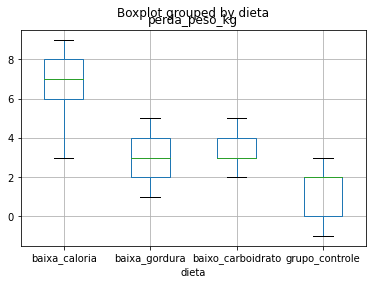

In [16]:
dados_dietas.boxplot(column='perda_peso_kg', by = 'dieta')

- Realizar teste

In [17]:
dados_baixa_cal = dados_dietas[dados_dietas['dieta'] == 'baixa_caloria']['perda_peso_kg']
dados_baixa_gor = dados_dietas[dados_dietas['dieta'] == 'baixa_gordura']['perda_peso_kg']
dados_baixo_cab = dados_dietas[dados_dietas['dieta'] == 'baixo_carboidrato']['perda_peso_kg']
dados_controle = dados_dietas[dados_dietas['dieta'] == 'grupo_controle']['perda_peso_kg']

In [18]:
f_oneway(dados_baixa_cal, dados_baixa_gor, dados_baixo_cab, dados_controle)

F_onewayResult(statistic=8.559322033898304, pvalue=0.0012777417892066623)

## Exemplo Slide 19

- Gráfico para verificar a relação

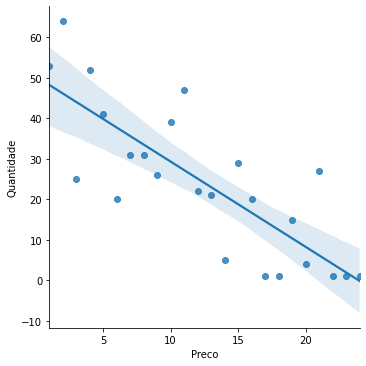

In [ ]:
sns.lmplot(x = 'Preco', y = 'Quantidade', 
           data = dados_preco_quant, fit_reg=True)

- Obter a correlação

In [ ]:
dados_preco_quant.corr()

,Preco,Quantidade
Preco,1.000000,-0.800847
Quantidade,-0.800847,1.000000
